In [1]:
import math
import matplotlib.pyplot as plt

import tkinter as tk
import time


# global variables
GRAVITY = 9.8
dt = 0.01


In [2]:

def graph (xs, ys, xlab, ylab, titlestr):
    fig = plt.figure()
    ax = fig.add_subplot()
    # fig, ax = plt.subplots()
    ax.plot(xs, ys, marker='.', markersize=2)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    
    ax.set(title=titlestr)
    ax.grid()
    plt.show()


def two_graphs(list1x, list1y, list2x, list2y, x_axis, y_axis, lab1, lab2, titlestr):
    
    fig, ax = plt.subplots()
    ax.plot(list1x, list1y, label='$' +lab1 + '$', marker='.', markersize=2)
    ax.plot(list2x, list2y, label='$'+ lab2 +'$', marker='.', markersize=2)
    ax.set(xlabel = x_axis ,ylabel= y_axis, title=titlestr)
    ax.grid()
    plt.legend()
    plt.show()



In [3]:

def make_lists_alicia(l1, l2, m1, m2, theta1_init, theta2_init, num_iter):
    '''
    initial conditions:
        l1: lenth of the top string
        l2: length of the bottom string
        m1: mass of object on top
        m2: mass of object on bottom
        set theta1_d and theta2_d to be 0
    '''
    
    x1_s = []
    y1_s = []
    x2_s = []
    y2_s = []
    ts = []
    theta1_s = []
    theta2_s = []
    theta1_d_s = []
    theta2_d_s = []
    theta1_dd_s = []
    theta2_dd_s = []
    
    # assign initial values
    theta1_d = 0
    theta2_d = 0
    theta1 = theta1_init
    theta2 = theta2_init
    
    
    for i in range (num_iter):
        
        t = dt*i
        
        theta1_dd_numerator = l1*theta1_d**2*(-math.sin(theta1-theta2)*math.cos(theta1-theta2)*m2) + l2*theta2_d**2*(math.cos(theta1)*math.sin(theta2)*m1 - math.sin(theta1)*math.cos(theta2)*m2) + ((m1+m2)*(-math.sin(theta1)) + math.sin(theta2)* math.cos(theta1-theta2)* m2)*GRAVITY
        
        theta1_dd_denom = l1*(m1+m2-m2*(math.cos(theta1-theta2))**2)
        
        theta1_dd = theta1_dd_numerator/theta1_dd_denom
        
        theta2_dd_numerator =  l1*theta1_d**2*(m1+m2)*math.cos(theta1)*(math.sin(theta1) - math.sin(theta2)) + l2*theta2_d**2*m2*math.cos(theta1-theta2)*math.sin(theta1-theta2) + (m1+m2)*(math.sin(theta1)*math.cos(theta1-theta2)-math.sin(theta2))*GRAVITY
        theta2_dd_denom = theta1_dd_denom/l1*l2
        theta2_dd = theta2_dd_numerator/theta2_dd_denom
        
        # theta2_dd =  -math.cos(theta2)*(l2*(-math.sin(theta2))-l1 * math.sin(theta1)*theta1_d**2  + l1*math.cos(theta1)*theta1_dd) - math.sin(theta2)*(l2*math.cos(theta2)*theta2_d**2 + l1*math.cos(theta1)*theta1_d**2 + l1*math.sin(theta1)*theta1_dd+GRAVITY)
        # theta2_dd = theta2_dd/l2
        
        theta1_d += theta1_dd*dt
        theta2_d += theta2_dd*dt
        
        theta1 += (theta1_d*dt + 1/2*dt**2*theta1_dd)
        theta2 += (theta2_d*dt + 1/2*dt**2*theta2_dd)
        
        # add items list
        ts.append(t)
        theta1_s.append(theta1)
        theta2_s.append(theta2)
        theta1_d_s.append(theta1_d)
        theta2_d_s.append(theta2_d)
        theta1_dd_s.append(theta1_dd)
        theta2_dd_s.append(theta2_dd)
        
        
        
    
    def find_r1r2 (theta_1, theta_2):
        '''
        given the two theta values, find r1 and r2 (components and add to string)
        '''
        x1 = l1 * math.sin(theta_1)
        y1 = l1* math.cos(theta_1)
        x2 = x1 + l2 * math.sin(theta_2)
        y2 = y1 + l2* math.cos(theta_2)
        x1_s.append(x1)
        y1_s.append(y1)
        x2_s.append(x2)
        y2_s.append(y2)

    for i in range (num_iter):
        find_r1r2(theta1_s[i], theta2_s[i])
    
    # graphing
    
    # graph theta1_dd and theta2_dd
    
    two_graphs(ts, theta1_dd_s, ts, theta2_dd_s, "Time (s)", "angular acceleration (theta double dot)", "theta 1", "theta 2", "Angular Accleration by Time")
    two_graphs(ts, theta1_d_s, ts, theta2_d_s, "Time (s)", "angular velocity (theta dot)", "theta 1", "theta 2", "Angular Velocity by Time")
    two_graphs(ts, theta1_s, ts, theta2_s, "Time (s)", "angular displacement (theta)", "theta 1", "theta 2", "Angular Displacement by Time")
    two_graphs(ts, x1_s, ts, x2_s, "Time (s)", "horizontal displacement", "mass 1", "mass 2", "Horizontal Displacement of the Two Masses by Time")
    # two_graphs(ts, y1_s, ts, y2_s, "Time (s)", "vertical displacement", "mass 1", "mass 2", "Vertical Displacement of the Two Masses by Time")

    return ts, x1_s, y1_s, x2_s, y2_s


In [4]:


def create_circle(x, y, r, canvasName): #center coordinates, radius
    x0 = x - r
    y0 = y - r
    x1 = x + r
    y1 = y + r
    return canvasName.create_oval(x0, y0, x1, y1, fill = "#C2185B")

def create_line1 (x1, y1, canvasName):
    return canvasName.create_line(750, 300, x1, y1)

def creat_line2 (x1, y1, x2, y2, canvasName):
    return canvasName.create_line(x1, y1, x2, y2)

    

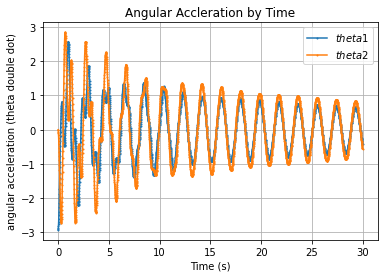

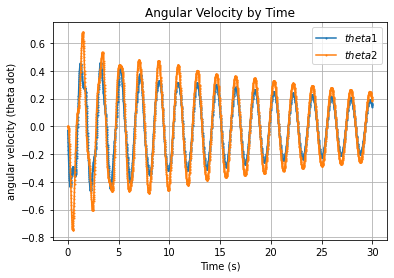

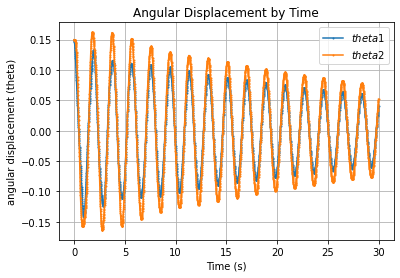

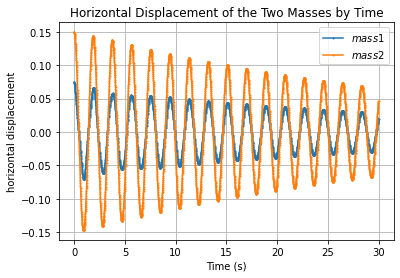

TclError: invalid command name ".!canvas"

In [6]:

if __name__ == '__main__':
    # THE PARAMETERS WERE MANUALLY CHANGED TO OBTAIN DIFFERENT GRAPHS AND SIMULATIONS
    t, x1, y1, x2, y2 = make_lists_alicia(0.5, 0.5, 2, 3, 0.15, 0.15, 3000)
    
    # SIMULATION 
    
    root = tk.Tk()

    myCanvas = tk.Canvas(root, width = 1500, height = 1000, background = "#C4E6F2")
    myCanvas.pack()
    
    
    for i in range (3000):
        myCanvas.delete("all")
        create_line1(750 + 100*x1[i], 100*y1[i]+300, myCanvas)
        creat_line2(750+ 100*x1[i], 100*y1[i]+300, 750+100*x2[i], 100* y2[i] +300, myCanvas)
        create_circle(750+ 100*x1[i], 100*y1[i]+300, 20, myCanvas)
        create_circle(750+ 100*x2[i], 100*y2[i]+300, 20, myCanvas)
        time.sleep(dt)
        
        myCanvas.update()
        
    root.mainloop() 
    